In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
p_data = "../Resources/project_data_final.csv"
p_df = pd.read_csv(p_data)
p_df['Date Completed'] = pd.to_datetime(p_df['Date Completed'])
#p_df = p_df.sort_values('Date Application Received', ascending=True)
p_df = p_df.drop(columns=['Unnamed: 0'])
p_df = p_df.dropna()

print(p_df['Purchase Type'].unique())
p_df.head(3)

dates = p_df['Date Completed']
y_m = []
for date in dates:
    y_m.append(date.strftime('%Y-%m'))
    
p_df['Year-Month'] = y_m

/Users/dmanandhar/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Purchase' 'Lease' 'Power Purchase Agreement']


In [3]:
#create analysis data frames
df = p_df[['Project Number','Sector','Date Completed','Purchase Type', 'Year-Month']]

purchase_df = df.loc[df['Purchase Type'] == 'Purchase']
purchase_df = purchase_df.reset_index()
purchase_df = purchase_df.drop(columns=['index'])
purchase_df = purchase_df.sort_values('Date Completed', ascending=True)
purchase_df = purchase_df.reset_index()
purchase_df = purchase_df.drop(columns=['index'])

lease_df = df.loc[df['Purchase Type'] == 'Lease']
lease_df = lease_df.reset_index()
lease_df = lease_df.drop(columns=['index'])
lease_df = lease_df.sort_values('Date Completed', ascending=True)
lease_df = lease_df.reset_index()
lease_df = lease_df.drop(columns=['index'])

ppa_df = df.loc[df['Purchase Type'] == 'Power Purchase Agreement']
ppa_df = ppa_df.reset_index()
ppa_df = ppa_df.drop(columns=['index'])
ppa_df = ppa_df.sort_values('Date Completed', ascending=True)
ppa_df = ppa_df.reset_index()
ppa_df = ppa_df.drop(columns=['index'])

print(len(purchase_df))
print(len(lease_df))
print(len(ppa_df))

print(ppa_df.head(3))

31237
30995
10743
  Project Number           Sector Date Completed             Purchase Type  \
0     4548-21056  Non-Residential     2011-06-08  Power Purchase Agreement   
1     4548-22794  Non-Residential     2011-08-15  Power Purchase Agreement   
2     4362-21106  Non-Residential     2011-11-04  Power Purchase Agreement   

  Year-Month  
0    2011-06  
1    2011-08  
2    2011-11  


In [4]:
## PURCHASE DATA
purchase_date_df = purchase_df.groupby('Year-Month')
purchase_date_df = purchase_date_df['Date Completed'].max()
purchase_date_df = purchase_date_df.to_frame()
purchase_date_df = purchase_date_df.sort_values('Date Completed', ascending=True)
purchase_date_df.head()

purchase_count_df = purchase_df['Year-Month'].value_counts()
purchase_count_df = purchase_count_df.to_frame()
purchase_count_df = purchase_count_df.reset_index()
purchase_count_df = purchase_count_df.rename(columns={'index':'Year-Month', 'Year-Month':'Project Count'})
purchase_count_df = purchase_count_df.set_index('Year-Month')
purchase_count_df.head()

# Final DataFrame for purchase_type == purchase
final_purchase_df = purchase_date_df.merge(purchase_count_df, left_index=True, right_index=True)
final_purchase_df.head()


## LEASE DATA
lease_date_df = lease_df.groupby('Year-Month')
lease_date_df = lease_date_df['Date Completed'].max()
lease_date_df = lease_date_df.to_frame()
lease_date_df = lease_date_df.sort_values('Date Completed', ascending=True)
lease_date_df.head()

lease_count_df = lease_df['Year-Month'].value_counts()
lease_count_df = lease_count_df.to_frame()
lease_count_df = lease_count_df.reset_index()
lease_count_df = lease_count_df.rename(columns={'index':'Year-Month', 'Year-Month':'Project Count'})
lease_count_df = lease_count_df.set_index('Year-Month')
lease_count_df.head()

# Final DataFrame for purchase_type == lease
final_lease_df = lease_date_df.merge(lease_count_df, left_index=True, right_index=True)
final_lease_df.head()


## POWER PURCHASE AGREEMENT
ppa_date_df = ppa_df.groupby('Year-Month')
ppa_date_df = ppa_date_df['Date Completed'].max()
ppa_date_df = ppa_date_df.to_frame()
ppa_date_df = ppa_date_df.sort_values('Date Completed', ascending=True)
ppa_date_df.head()

ppa_count_df = ppa_df['Year-Month'].value_counts()
ppa_count_df = ppa_count_df.to_frame()
ppa_count_df = ppa_count_df.reset_index()
ppa_count_df = ppa_count_df.rename(columns={'index':'Year-Month', 'Year-Month':'Project Count'})
ppa_count_df = ppa_count_df.set_index('Year-Month')
ppa_count_df.head()

# Final DataFrame for purchase_type == lease
final_ppa_df = ppa_date_df.merge(ppa_count_df, left_index=True, right_index=True)
final_ppa_df.head()

,Date Completed,Project Count
Year-Month,,
2011-06,2011-06-08,1
2011-08,2011-08-15,1
2011-11,2011-11-10,3
2011-12,2011-12-30,2
2012-01,2012-01-27,1


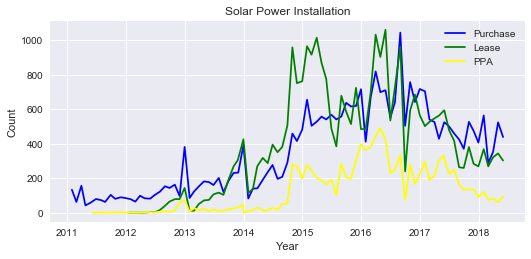

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(8.5,3.7))
plt.plot(final_purchase_df["Date Completed"], final_purchase_df["Project Count"], c='blue', label='Purchase')

plt.plot(final_lease_df["Date Completed"], final_lease_df["Project Count"], c='green', label='Lease')

plt.plot(final_ppa_df["Date Completed"], final_ppa_df["Project Count"], c='yellow', label='PPA')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title("Solar Power Installation")
plt.legend()
plt.savefig("SolarInstallation_per_Year.png")
plt.show()